### Harvard GSD  J-Term 2022 
### Introduction to Data Science for Building Simulation and Architectural Design
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 3-7/ 9:30 - 11:00 a.m. <br>
***

Pease copy this colab notebook and rename it before you start! 

---

## Install the required packages



In [1]:
!pip install censusdata
!pip install tabulate
!pip install geopandas
!pip install contextily
!pip install folium

     |████████████████████████████████| 26.6 MB 2.1 MB/s 
  Created wheel for censusdata: filename=CensusData-1.15-py3-none-any.whl size=28205534 sha256=ea40ff486e61c74173d5a0ab496ca36db420ff52eb96f3516aea11b8fb6df353
  Stored in directory: /root/.cache/pip/wheels/17/11/8c/933901298f486bd414f2ab1a62a114085f7d7a19dcbda2dd08
Successfully built censusdata
     |████████████████████████████████| 1.0 MB 25.3 MB/s 
     |████████████████████████████████| 15.4 MB 55.7 MB/s 
     |████████████████████████████████| 6.3 MB 53.1 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [2]:
# import library
import numpy as np
import pandas as pd
from tabulate import tabulate
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import seaborn as sns

import geopandas as gpd
import contextily
import folium
from folium import plugins

import sys, os
from IPython.display import display

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Rent data for regression

In [4]:
# assign file path
rent_data_path = '/content/drive/My Drive/Colab Notebooks/J_Term/BigData/_RentPriceTruliaMergeForML.csv'

In [5]:
# load data
rent_df = pd.read_csv(rent_data_path)
rent_df.tail()

Unnamed: 0    index  pixelPlant  ...         SQM   Price  PricePerSQM
3748        4171  13041.0         0.0  ...   88.815268  1600.0    18.014921
3749        4172  13043.0         0.0  ...   88.815268  1695.0    19.084556
3750        4173  13045.0         0.0  ...   92.903000  1600.0    17.222264
3751        4174  13046.0         0.0  ...   96.619120  1600.0    16.559869
3752        4175  13048.0         0.0  ...  111.483600  2100.0    18.836851

[5 rows x 50 columns]

In [6]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3753 non-null   int64  
 1   index               3753 non-null   float64
 2   pixelPlant          3753 non-null   float64
 3   pixelPole           3753 non-null   float64
 4   pixelLake           3753 non-null   float64
 5   pixelRoad           3753 non-null   float64
 6   pixelGrass          3753 non-null   float64
 7   pixelWall           3753 non-null   float64
 8   pixelCar            3753 non-null   float64
 9   propertiesAsses     3753 non-null   float64
 10  pixelSea            3753 non-null   float64
 11  numCraigslistHouse  3753 non-null   float64
 12  pixelRiver          3753 non-null   float64
 13  pixelBus            3753 non-null   float64
 14  pixelCeiling        3753 non-null   float64
 15  pixelPath           3753 non-null   float64
 16  pixelB

In [7]:
# check null data 
# Your code here
for col in rent_df.columns:
  print (col, len(rent_df[rent_df[col].isnull()]))

Unnamed: 0 0
index 0
pixelPlant 0
pixelPole 0
pixelLake 0
pixelRoad 0
pixelGrass 0
pixelWall 0
pixelCar 0
propertiesAsses 0
pixelSea 0
numCraigslistHouse 0
pixelRiver 0
pixelBus 0
pixelCeiling 0
pixelPath 0
pixelBuilding 0
crime 0
pixelFence 0
walkSchool 0
walkMbta 0
energySiteEUI 0
pixelPerson 0
pixelTree 0
pixelVan 0
walkPark 0
walkUniversity 0
pixelSidewalk 0
pixelGround 0
pixelMountain 0
pixelPalmTree 0
pixelHouse 0
pixelBridge 0
pixelSign 0
pixelRailing 0
pixelField 0
pixelWindow 0
pixelGrandstand 0
numCraigslistRoom 0
pixelSky 0
Latitude 0
Longitude 0
Address 0
Zip 0
RoomType 0
Bathrooms 0
SQFT 0
SQM 0
Price 0
PricePerSQM 0


In [8]:
# checking the column names
rent_df.columns.values

array(['Unnamed: 0', 'index', 'pixelPlant', 'pixelPole', 'pixelLake',
       'pixelRoad', 'pixelGrass', 'pixelWall', 'pixelCar',
       'propertiesAsses', 'pixelSea', 'numCraigslistHouse', 'pixelRiver',
       'pixelBus', 'pixelCeiling', 'pixelPath', 'pixelBuilding', 'crime',
       'pixelFence', 'walkSchool', 'walkMbta', 'energySiteEUI',
       'pixelPerson', 'pixelTree', 'pixelVan', 'walkPark',
       'walkUniversity', 'pixelSidewalk', 'pixelGround', 'pixelMountain',
       'pixelPalmTree', 'pixelHouse', 'pixelBridge', 'pixelSign',
       'pixelRailing', 'pixelField', 'pixelWindow', 'pixelGrandstand',
       'numCraigslistRoom', 'pixelSky', 'Latitude', 'Longitude',
       'Address', 'Zip', 'RoomType', 'Bathrooms', 'SQFT', 'SQM', 'Price',
       'PricePerSQM'], dtype=object)

In [9]:
# Process data 

data = rent_df[(rent_df['PricePerSQM']>150) == False]  # Filtering data

y_new = data["PricePerSQM"] # select data for prediction
y = data["PricePerSQM"].values


data = data.drop("PricePerSQM",1) # drop unnecessary data
data = data.drop('pixelFence',1)
data = data.drop("index",1)
data = data.drop("SQFT",1)
data = data.drop('Unnamed: 0',1)
data = data.drop('Price',1)

x = data.values # create data for training

In [10]:
data

pixelPlant  pixelPole  pixelLake  ...  RoomType  Bathrooms         SQM
0            0.0      0.000     60.990  ...       3.0        2.0  132.386775
1            0.0      0.004     34.120  ...       3.0        3.5  232.257500
2            0.0      0.000      0.000  ...       2.0        2.5  209.031750
3            0.0      0.000     37.650  ...       4.0        2.0  123.096475
4            0.0      0.000     37.650  ...       2.0        1.0   69.677250
...          ...        ...        ...  ...       ...        ...         ...
3748         0.0      0.000      0.183  ...       2.0        1.0   88.815268
3749         0.0      0.000      0.183  ...       2.0        1.0   88.815268
3750         0.0      0.000      0.183  ...       2.0        1.5   92.903000
3751         0.0      0.000      0.183  ...       2.0        1.0   96.619120
3752         0.0      0.000      0.183  ...       3.0        1.0  111.483600

[3749 rows x 44 columns]

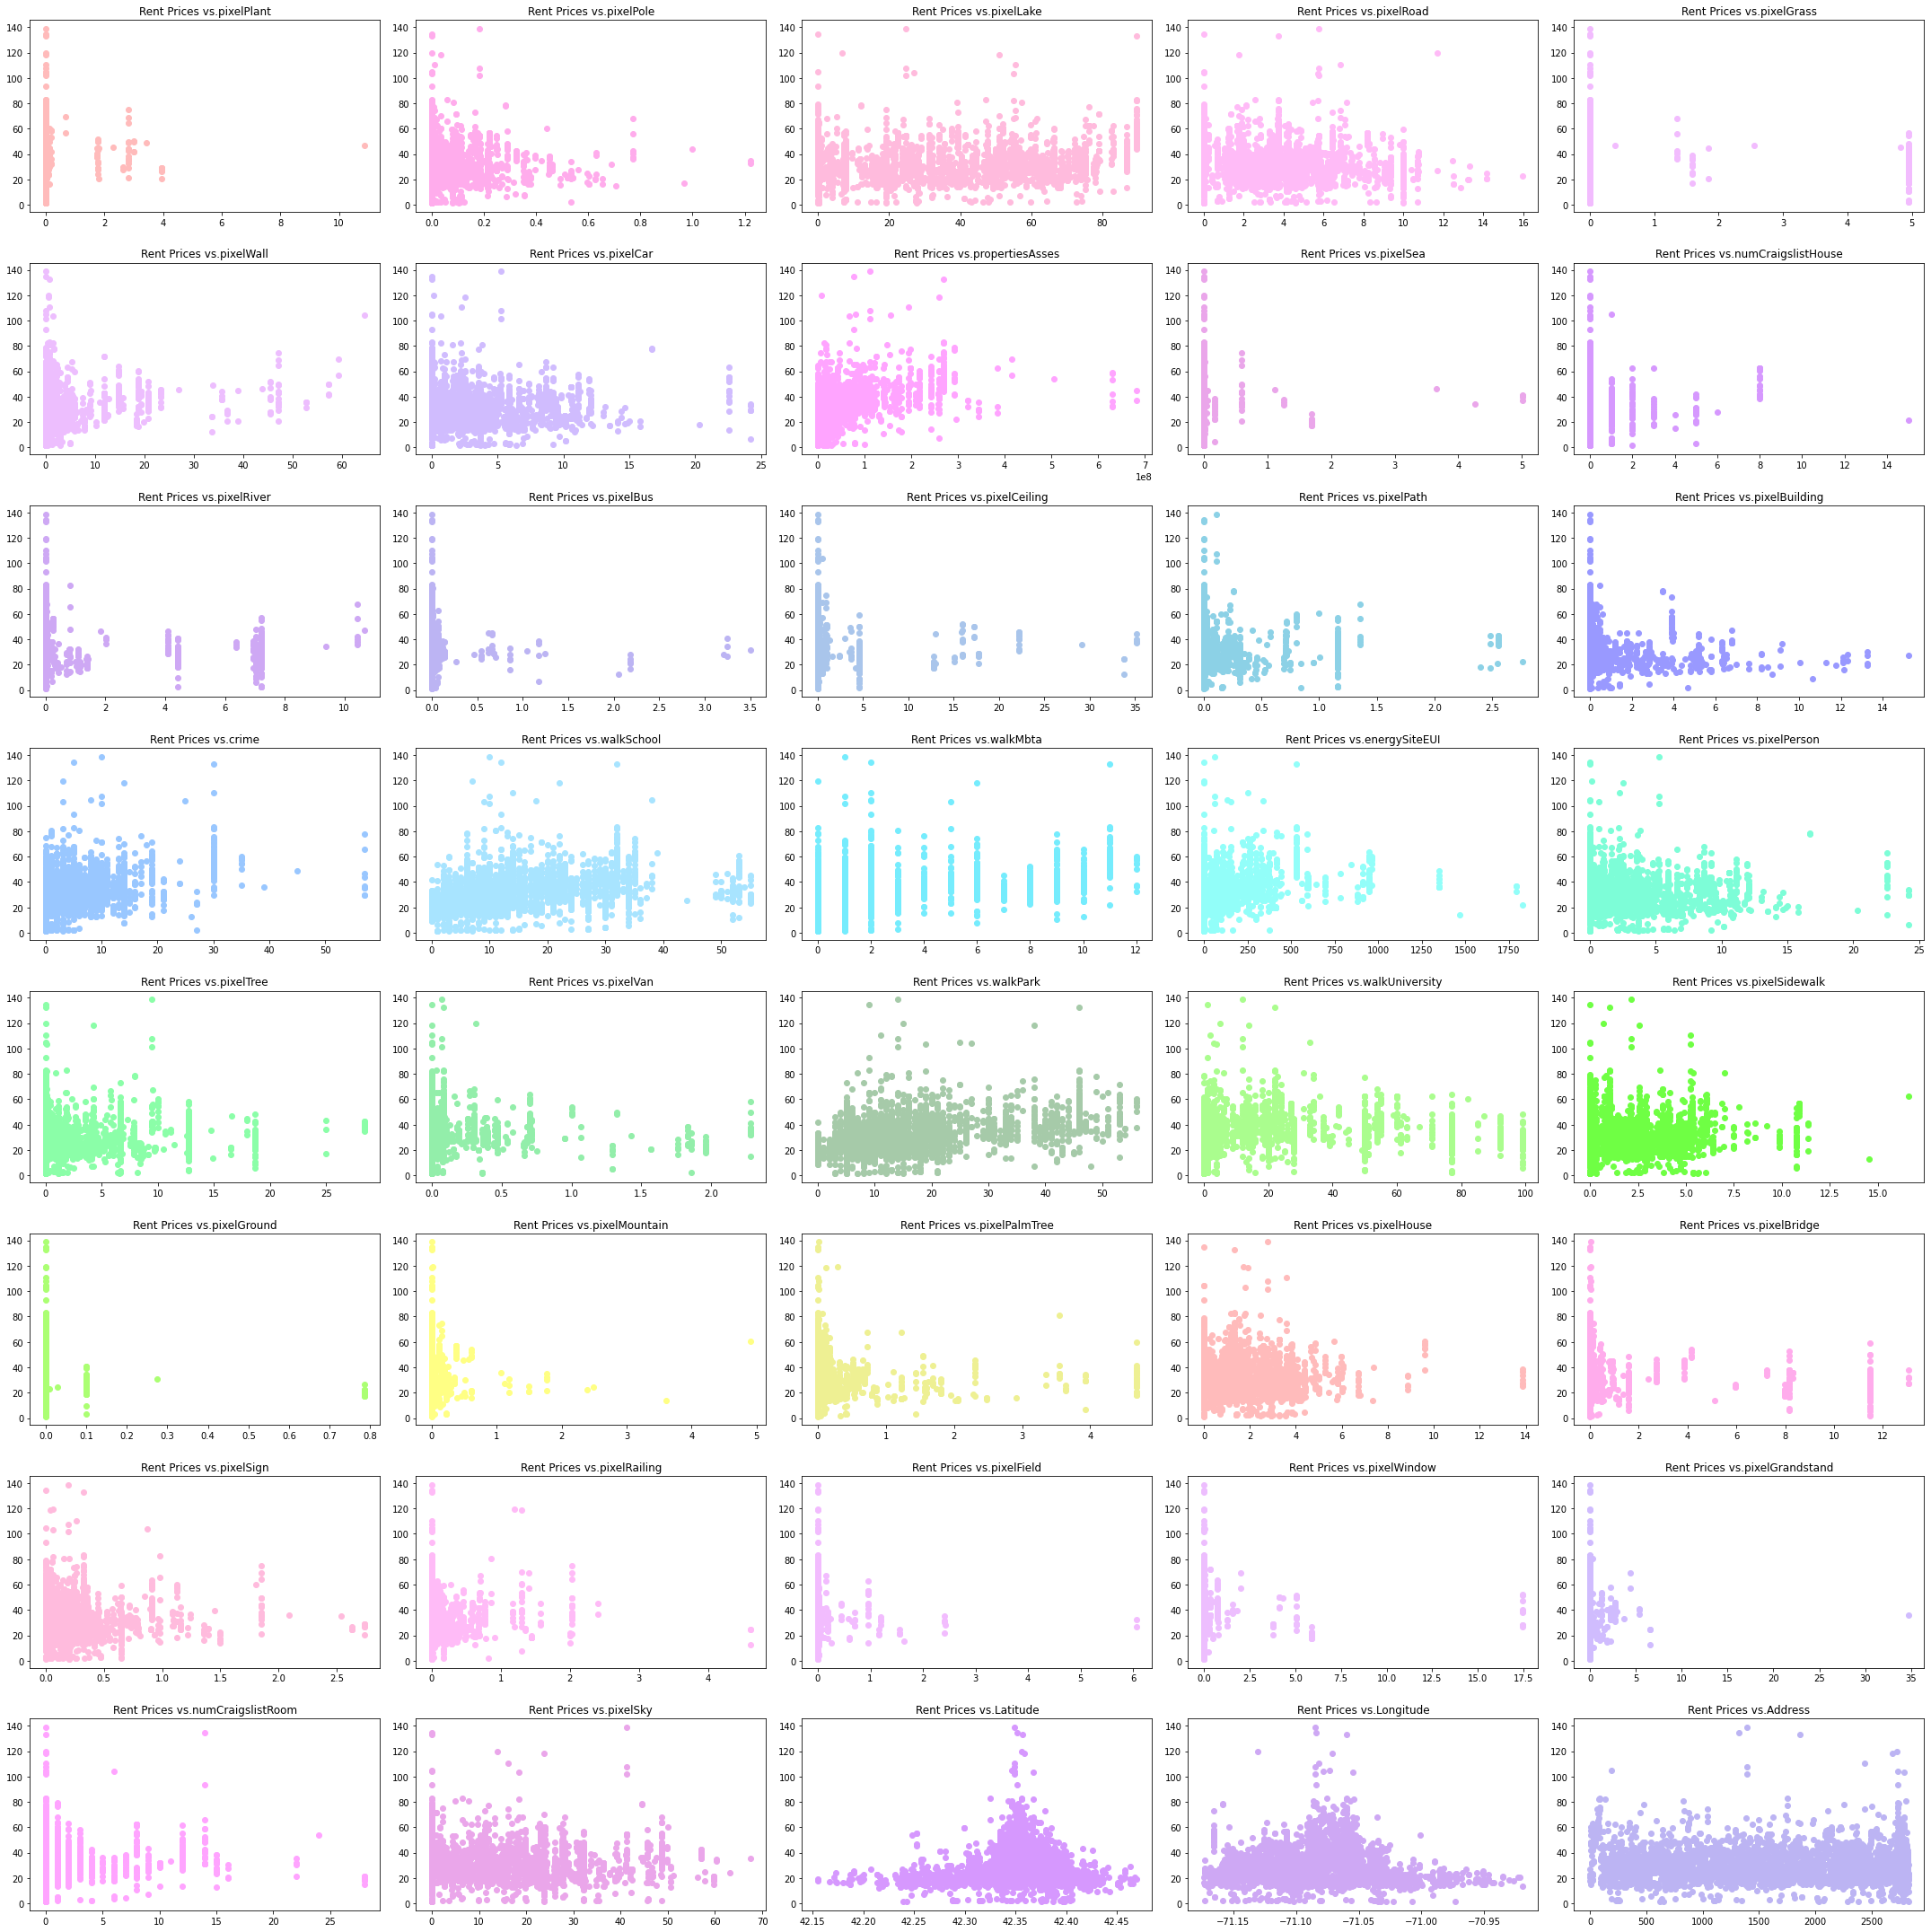

In [11]:
# Visualize data 

theRow = 5
theCol = 8

cmaps = ["#FFBBBB","#FFACEC","#FFBBDD","#FFBBF7","#F2BCFE","#EDBEFE","#D0BCFE", "#FFA4FF", "#EAA6EA",
    "#D698FE", "#CEA8F4", "#BCB4F3","#A9C5EB","#8CD1E6","#9999FF","#99C7FF","#A8E4FF","#75ECFD","#92FEF9","#7DFDD7","#8BFEA8","#93EEAA",
"#A6CAA9","#AAFD8E","#6FFF44","#ABFF73","#FFFF84","#EEF093"]
fig,ax = plt.subplots(theCol,theRow,figsize=(30,30))

count = 0;
countColor = 0;
for j in range(theCol):
    for i in range(theRow):
        if(countColor == len(cmaps)): countColor =0
        # Your code here
        # plot column data with rentprice
        ax[j,i].scatter(data[data.columns[count]],y, c=cmaps[countColor])
        ax[j,i].set_title('Rent Prices vs.'+data.columns[count])
        ax[j,i].set_title('Rent Prices vs.'+data.columns[count])
        count+=1
        countColor+=1
fig.tight_layout()    
fig.savefig("pic", transparent = True)


In [12]:
# Feature selection
from sklearn.ensemble import RandomForestRegressor

# Your code here
# Training ML model 
model = RandomForestRegressor()
model.fit(data, y_new)



RandomForestRegressor()

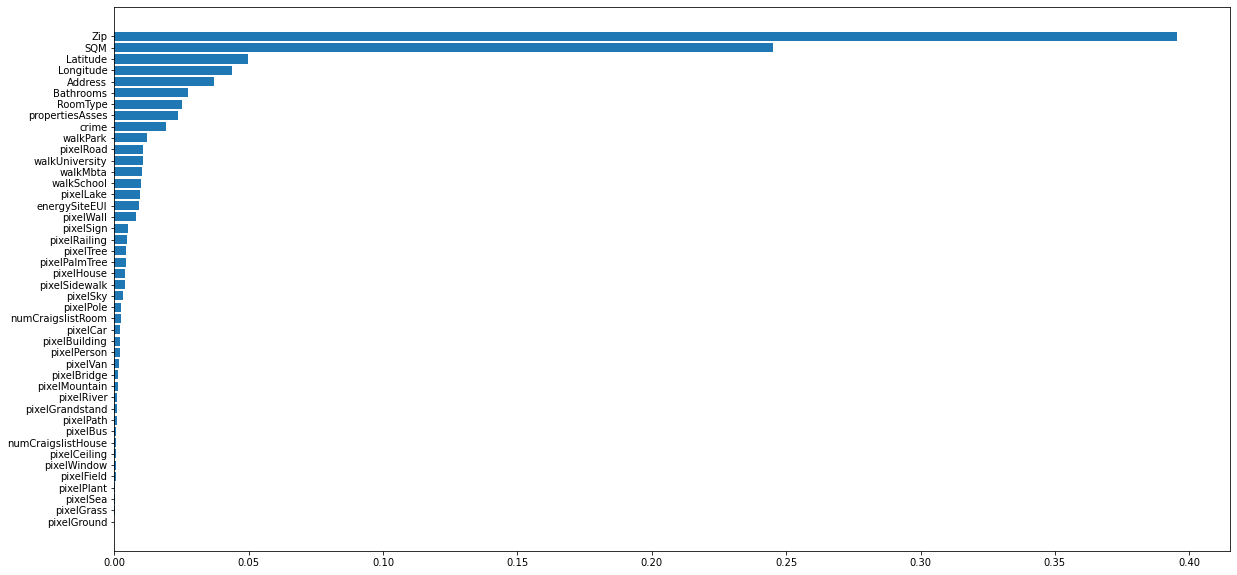

In [13]:
# feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(20,10))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(data.columns)[indices])

In [14]:
data

pixelPlant  pixelPole  pixelLake  ...  RoomType  Bathrooms         SQM
0            0.0      0.000     60.990  ...       3.0        2.0  132.386775
1            0.0      0.004     34.120  ...       3.0        3.5  232.257500
2            0.0      0.000      0.000  ...       2.0        2.5  209.031750
3            0.0      0.000     37.650  ...       4.0        2.0  123.096475
4            0.0      0.000     37.650  ...       2.0        1.0   69.677250
...          ...        ...        ...  ...       ...        ...         ...
3748         0.0      0.000      0.183  ...       2.0        1.0   88.815268
3749         0.0      0.000      0.183  ...       2.0        1.0   88.815268
3750         0.0      0.000      0.183  ...       2.0        1.5   92.903000
3751         0.0      0.000      0.183  ...       2.0        1.0   96.619120
3752         0.0      0.000      0.183  ...       3.0        1.0  111.483600

[3749 rows x 44 columns]

In [15]:
y_new

0       32.102905
1       40.902877
2       40.663679
3       58.490708
4       54.537170
          ...    
3748    18.014921
3749    19.084556
3750    17.222264
3751    16.559869
3752    18.836851
Name: PricePerSQM, Length: 3749, dtype: float64

In [16]:
# calculate the percentile range 

# your code here
print (y_new.quantile(0.25))
print (y_new.quantile(0.5))
print (y_new.quantile(0.75))

21.920084241399998
28.8668630918
36.9507531608


No handles with labels found to put in legend.


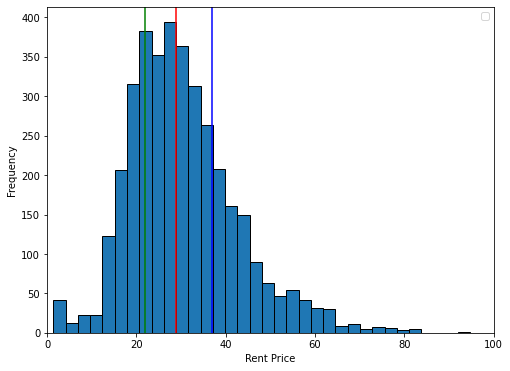

In [18]:
# 25%         21.92
# 50%         28.86
# 75%         36.95
a =         21.92
b =         28.86
c =         36.95

# plot histogram
fig = plt.figure(figsize=(8,6))

# your code here

plt.hist(y,bins=50, edgecolor="black")
plt.axvline(a, c = "green")
plt.axvline(b, c = "red")
plt.axvline(c, c = "blue")

plt.xlabel("Rent Price")
plt.ylabel("Frequency")
plt.xlim(0, 100)
plt.legend()
plt.show()

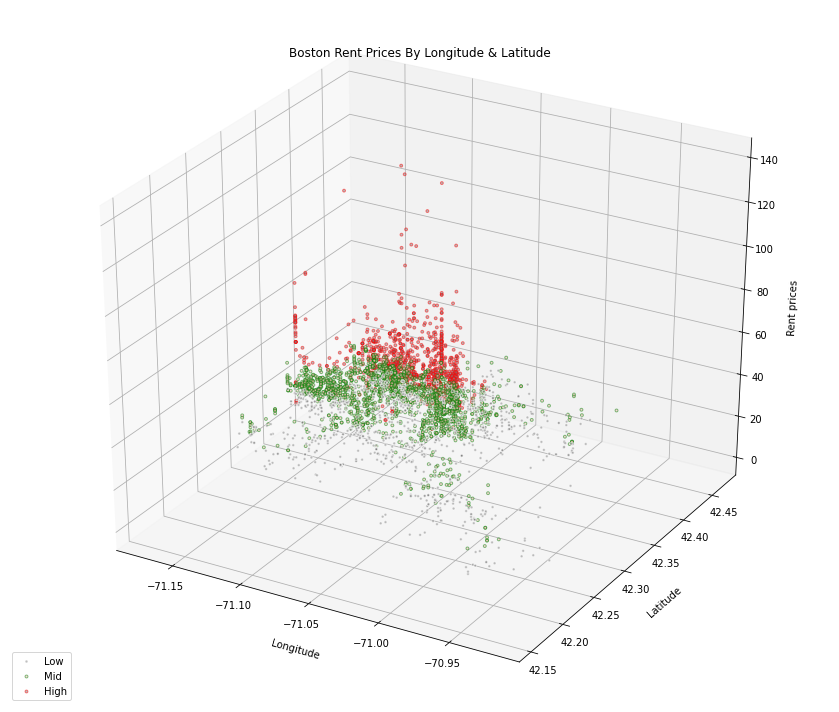

In [20]:
# plotting boston data
fig = plt.figure(figsize=(35,10))

#Project onto axes: 1, 2, 3
ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

newData = pd.DataFrame()
newData['Longitude'] = data['Longitude']
newData['Latitude'] = data['Latitude']
newData['y'] = y

# filtering newData1 and newData2 and newData3 with percentile values
# your code here

newData1= newData[newData['y']<a]
newData2= newData[(newData['y']>a)&(newData['y']<c)]
newData3= newData[newData['y']>c]

ax1.scatter(newData1['Longitude'], newData1['Latitude'],newData1['y'], label='Low' , facecolors = "gray",edgecolors = "white",alpha = 0.5, s=8)
ax1.scatter(newData2['Longitude'], newData2['Latitude'],newData2['y'], label='Mid' , facecolors = "#FFBBBB",edgecolors = "green",alpha = 0.5, s=8)
ax1.scatter(newData3['Longitude'], newData3['Latitude'],newData3['y'], label='High' , facecolors = "gray",edgecolors = "red",alpha = 0.5, s=8)

ax1.set_xlabel('\n'+'\n' + 'Longitude')
ax1.set_ylabel('\n'+'\n' +'Latitude')
ax1.set_zlabel('\n'+'\n' +'Rent prices')
ax1.set_title('Boston Rent Prices By Longitude & Latitude')
ax1.legend(loc='lower left')

plt.tight_layout()
plt.show()

#Covid Data for classification

In [21]:
# assign file path
covid_data_path = '/content/drive/My Drive/Colab Notebooks/J_Term/BigData/wisc-COVID-19_Historical_Data_by_Census_Tract.csv'

In [22]:
# load data
covid_df = pd.read_csv(covid_data_path)
covid_df.head()

GEOID           GEO  NAME  ... HOSP_NO  HOSP_UNK  OBJECTID
0  55021970900  Census tract   NaN  ...  -999.0    -999.0       185
1  55021971000  Census tract   NaN  ...  -999.0    -999.0       186
2  55021971100  Census tract   NaN  ...  -999.0    -999.0       187
3  55021971200  Census tract   NaN  ...  -999.0    -999.0       188
4  55023960100  Census tract   NaN  ...  -999.0    -999.0       190

[5 rows x 19 columns]

In [23]:
# check data information
# your code here
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301430 entries, 0 to 301429
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   GEOID         301430 non-null  object 
 1   GEO           301430 non-null  object 
 2   NAME          0 non-null       float64
 3   DATE          301430 non-null  object 
 4   POSITIVE      301430 non-null  int64  
 5   POS_NEW       0 non-null       float64
 6   POS_7DAYAVG   301216 non-null  float64
 7   NEGATIVE      301430 non-null  int64  
 8   NEG_NEW       0 non-null       float64
 9   NEG_7DAYAVG   300089 non-null  float64
 10  DEATHS        301430 non-null  int64  
 11  DTH_NEW       0 non-null       float64
 12  DTH_7DAYAVG   301427 non-null  float64
 13  TEST_NEW      0 non-null       float64
 14  TEST_7DAYAVG  300028 non-null  float64
 15  HOSP_YES      259370 non-null  float64
 16  HOSP_NO       259370 non-null  float64
 17  HOSP_UNK      259370 non-null  float64
 18  OBJE

In [25]:
# drop column with null
# your code here
covid_df.drop(columns=["NAME","POS_NEW","NEG_NEW","DTH_NEW","TEST_NEW"], axis=1, inplace=True)


In [26]:
covid_df.head()

GEOID           GEO  ... HOSP_UNK  OBJECTID
0  55021970900  Census tract  ...   -999.0       185
1  55021971000  Census tract  ...   -999.0       186
2  55021971100  Census tract  ...   -999.0       187
3  55021971200  Census tract  ...   -999.0       188
4  55023960100  Census tract  ...   -999.0       190

[5 rows x 14 columns]

In [27]:
# remove time leaving only date since we do not care about the time the data was recorded
covid_df['DATE'] = pd.to_datetime(covid_df['DATE']).dt.date

In [28]:
# find start date and end date of the entire dataframe
print(min(covid_df['DATE']))
print(max(covid_df['DATE']))

2020-04-11
2020-11-11


In [29]:
# sort by date
# your code here
covid_df["DATE"] = pd.to_datetime(covid_df["DATE"]).dt.date

print(covid_df.shape)
covid_df

(301430, 14)


GEOID           GEO        DATE  ...  HOSP_NO  HOSP_UNK  OBJECTID
0       55021970900  Census tract  2020-06-15  ...   -999.0    -999.0       185
1       55021971000  Census tract  2020-06-15  ...   -999.0    -999.0       186
2       55021971100  Census tract  2020-06-15  ...   -999.0    -999.0       187
3       55021971200  Census tract  2020-06-15  ...   -999.0    -999.0       188
4       55023960100  Census tract  2020-06-15  ...   -999.0    -999.0       190
...             ...           ...         ...  ...      ...       ...       ...
301425  55023960300  Census tract  2020-11-10  ...     46.0      13.0    421619
301426  55023960400  Census tract  2020-11-10  ...     59.0      45.0    421620
301427  55023960500  Census tract  2020-11-10  ...     42.0      29.0    421621
301428  55023960600  Census tract  2020-11-10  ...     64.0      65.0    421622
301429  55025000100  Census tract  2020-11-10  ...     33.0      30.0    421627

[301430 rows x 14 columns]

In [30]:
# check N/A GeoID
covid_df.loc[covid_df['GEOID']=='TRACT N/A']

GEOID           GEO        DATE  ...  HOSP_NO  HOSP_UNK  OBJECTID
770     TRACT N/A  Census tract  2020-06-16  ...    291.0     201.0      1002
2634    TRACT N/A  Census tract  2020-06-22  ...    321.0     218.0      2949
3337    TRACT N/A  Census tract  2020-06-21  ...    316.0     210.0      3690
5084    TRACT N/A  Census tract  2020-06-20  ...    312.0     209.0      5519
7102    TRACT N/A  Census tract  2020-06-02  ...    237.0     185.0      7651
...           ...           ...         ...  ...      ...       ...       ...
294798  TRACT N/A  Census tract  2020-11-08  ...   4459.0    4438.0    400687
297246  TRACT N/A  Census tract  2020-11-07  ...   4425.0    4360.0    407727
297330  TRACT N/A  Census tract  2020-11-11  ...   4650.0    4656.0    408912
300103  TRACT N/A  Census tract  2020-11-09  ...   4496.0    4494.0    416740
301278  TRACT N/A  Census tract  2020-11-10  ...   4567.0    4564.0    420863

[215 rows x 14 columns]

In [31]:
# Filtering data with non 'TRACT N/A' in GeoID
# your code here

covid_df = covid_df[covid_df['GEOID'] != 'TRACT N/A']

covid_df.shape

(301215, 14)

In [32]:
covid_df.loc[covid_df['GEOID']=='TRACT N/A']

Empty DataFrame
Columns: [GEOID, GEO, DATE, POSITIVE, POS_7DAYAVG, NEGATIVE, NEG_7DAYAVG, DEATHS, DTH_7DAYAVG, TEST_7DAYAVG, HOSP_YES, HOSP_NO, HOSP_UNK, OBJECTID]
Index: []

In [33]:
# since data starts from mid Apr/May and ends in mid Nov, take only complete months from June to Oct (5 months in total)
start_date = pd.to_datetime("2020-06-01").date()
end_date = pd.to_datetime("2020-10-31").date()

date_mask = (covid_df['DATE'] >= start_date) & (covid_df['DATE'] <= end_date)

covid_df_5months = covid_df.loc[date_mask]

In [34]:
# replace -999 with NaN
covid_df_5months.replace(-999, np.nan, inplace=True)

In [35]:
print('Total number of Covid cases in June to Oct for Wisconsin: ', covid_df_5months.groupby(['GEOID'])['POSITIVE'].max().sum())

Total number of Covid cases in June to Oct for Wisconsin:  217119.0


In [36]:
# cumulative cases of covid 19 in each census tract
# your code here

covid_df_5months.groupby(["GEOID"])["POSITIVE"].max()


GEOID
55001950100    104.0
55001950201     30.0
55001950202     99.0
55001950400    122.0
55001950501     19.0
               ...  
55141011300    127.0
55141011400    136.0
55141011500    180.0
55141011600    103.0
55141011700    137.0
Name: POSITIVE, Length: 1401, dtype: float64

[]

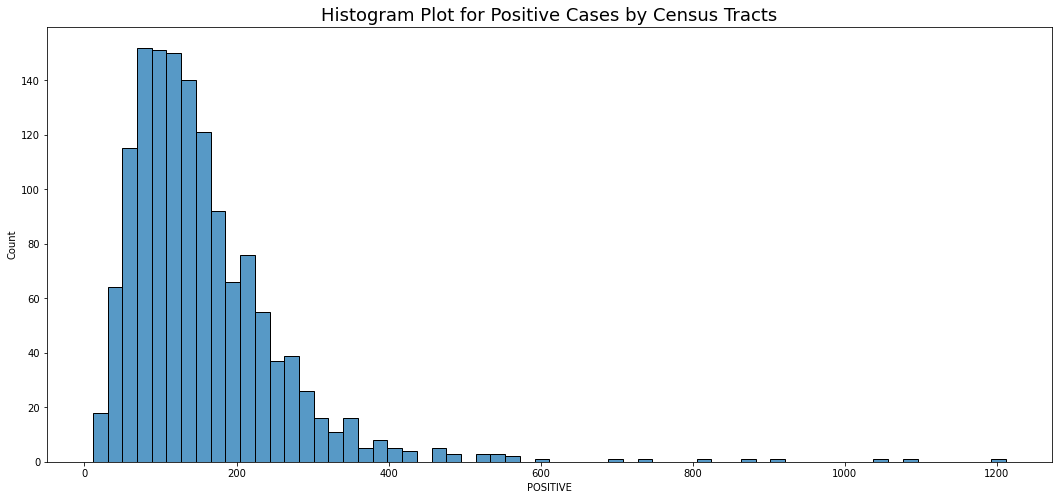

In [37]:
# Positive cases
plt.figure(figsize=(18, 8))
# your code here

sns.histplot(covid_df_5months.groupby(["GEOID"])["POSITIVE"].max())

plt.title('Histogram Plot for Positive Cases by Census Tracts', fontsize=18)
plt.plot()

[]

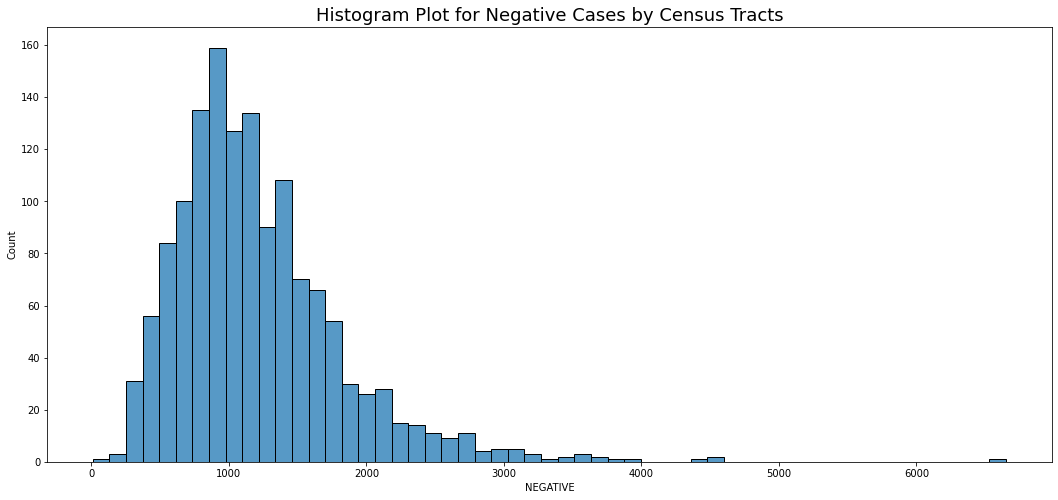

In [38]:
# Negative cases
plt.figure(figsize=(18, 8))
# your code here

sns.histplot(covid_df_5months.groupby(["GEOID"])["NEGATIVE"].max())

plt.title('Histogram Plot for Negative Cases by Census Tracts', fontsize=18)
plt.plot()

In [39]:
# grab census data for population within each census tract
census_raw_path = '/content/drive/My Drive/Colab Notebooks/J_Term/BigData/pdb2017tract_2010MRR_2018ACS_WI.xlsx'
census_df = pd.read_excel(census_raw_path, header=5)
census_to_match = census_df[['GEOIDtxt', 'TotPop']]
census_to_match.rename(columns={'GEOIDtxt' : 'GEOID'}, inplace=True)
census_to_match.head()

GEOID  TotPop
0  55001950100    2870
1  55001950201    1244
2  55001950202    2599
3  55001950400    4533
4  55001950501    1603

In [40]:
# assign the grouped data with new dataframe 
covid_cases_df = pd.DataFrame(covid_df_5months.groupby(['GEOID'])['POSITIVE'].max())
covid_cases_df.reset_index(inplace=True)
covid_cases_df['GEOID'] = covid_cases_df['GEOID'].astype(int)
covid_cases_df.head()

GEOID  POSITIVE
0  55001950100     104.0
1  55001950201      30.0
2  55001950202      99.0
3  55001950400     122.0
4  55001950501      19.0

In [41]:
# merge population data in census to covid positive cases by census tract using GEOID as key
# your code here

covid_cases_norm = pd.merge(census_to_match,covid_cases_df, on="GEOID")

In [42]:
covid_cases_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1400
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GEOID     1401 non-null   int64  
 1   TotPop    1401 non-null   int64  
 2   POSITIVE  1392 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 43.8 KB


In [44]:
covid_cases_norm.isnull()

GEOID  TotPop  POSITIVE
0     False   False     False
1     False   False     False
2     False   False     False
3     False   False     False
4     False   False     False
...     ...     ...       ...
1396  False   False     False
1397  False   False     False
1398  False   False     False
1399  False   False     False
1400  False   False     False

[1401 rows x 3 columns]

In [45]:
# drop rows with null positive cases
# your code here
covid_cases_norm.dropna(inplace=True)

covid_cases_norm.shape

(1392, 3)

In [46]:
# calculating normalize positive cases
covid_cases_norm['POS_NORM'] = covid_cases_norm['POSITIVE'] / covid_cases_norm['TotPop']

In [47]:
covid_cases_norm.head()

GEOID  TotPop  POSITIVE  POS_NORM
0  55001950100    2870     104.0  0.036237
1  55001950201    1244      30.0  0.024116
2  55001950202    2599      99.0  0.038092
3  55001950400    4533     122.0  0.026914
4  55001950501    1603      19.0  0.011853

[]

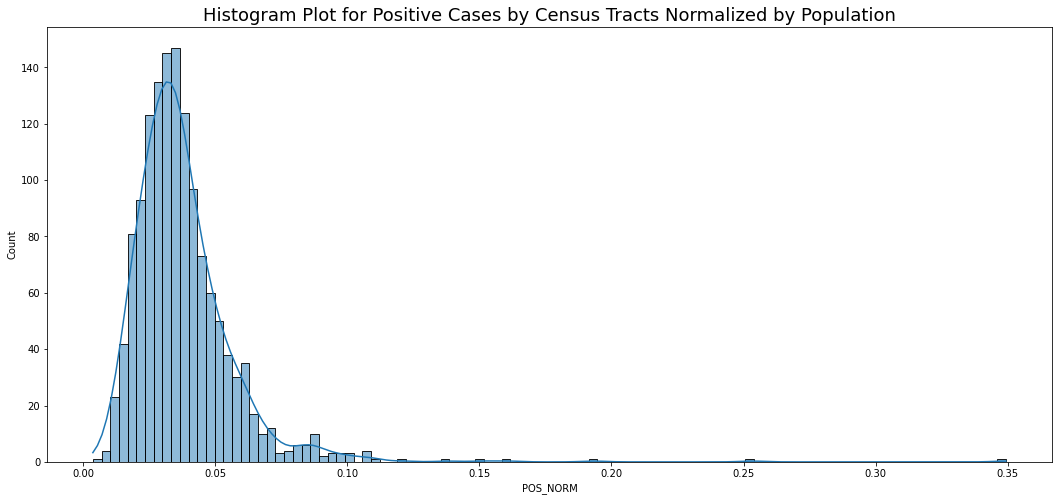

In [48]:
# Positive Normalized
plt.figure(figsize=(18, 8))
sns.histplot(covid_cases_norm['POS_NORM'], kde=True)
plt.title('Histogram Plot for Positive Cases by Census Tracts Normalized by Population', fontsize=18)
plt.plot()

[]

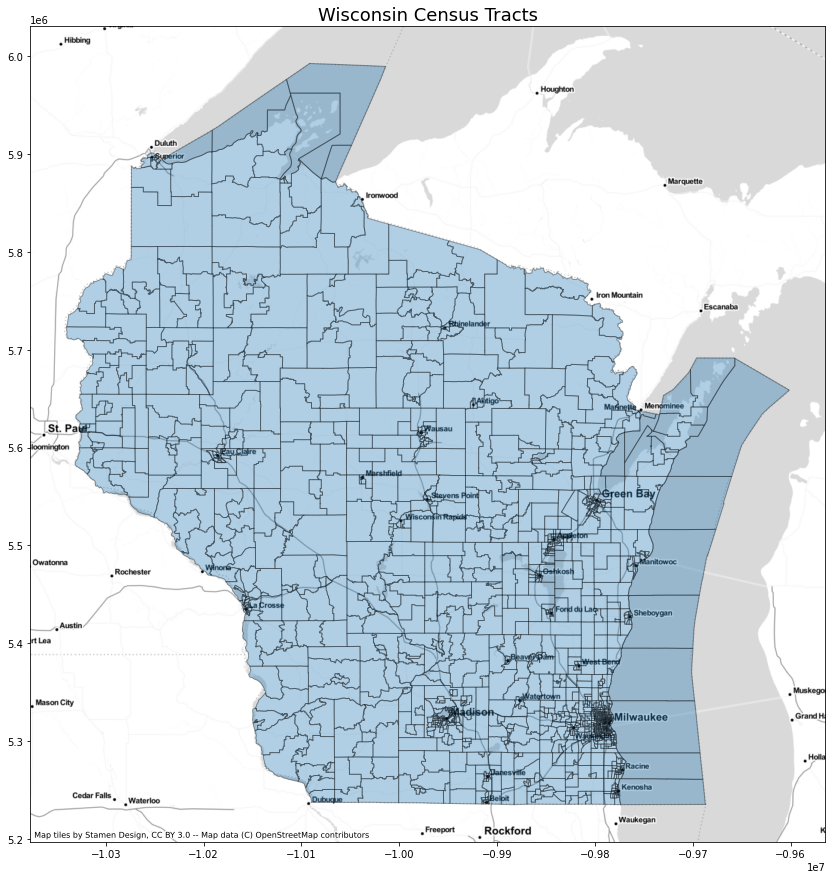

In [49]:
# import and plot Wisconsin GIS files
shp_path = '/content/drive/My Drive/Colab Notebooks/J_Term/BigData/tl_2018_55_tract.shp'
gdf = gpd.read_file(shp_path)
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(15,15), alpha=0.35, edgecolor='k')
contextily.add_basemap(ax, source=contextily.providers.Stamen.TonerLite)
plt.title("Wisconsin Census Tracts", fontsize=18)
plt.plot()

In [50]:
gdf['GEOID'] = gdf['GEOID'].astype(int)

In [51]:
# merge population data in census to covid positive cases by census tract using GEOID as key
gdf_covid = gdf.merge(covid_cases_norm, on='GEOID')

In [52]:
gdf_covid.head()

STATEFP COUNTYFP TRACTCE  ...  TotPop POSITIVE  POS_NORM
0      55      009  940002  ...    4552    256.0  0.056239
1      55      009  001600  ...    6009    569.0  0.094691
2      55      009  001801  ...    5494    290.0  0.052785
3      55      009  001802  ...    6236    234.0  0.037524
4      55      009  002001  ...    8669    562.0  0.064829

[5 rows x 16 columns]

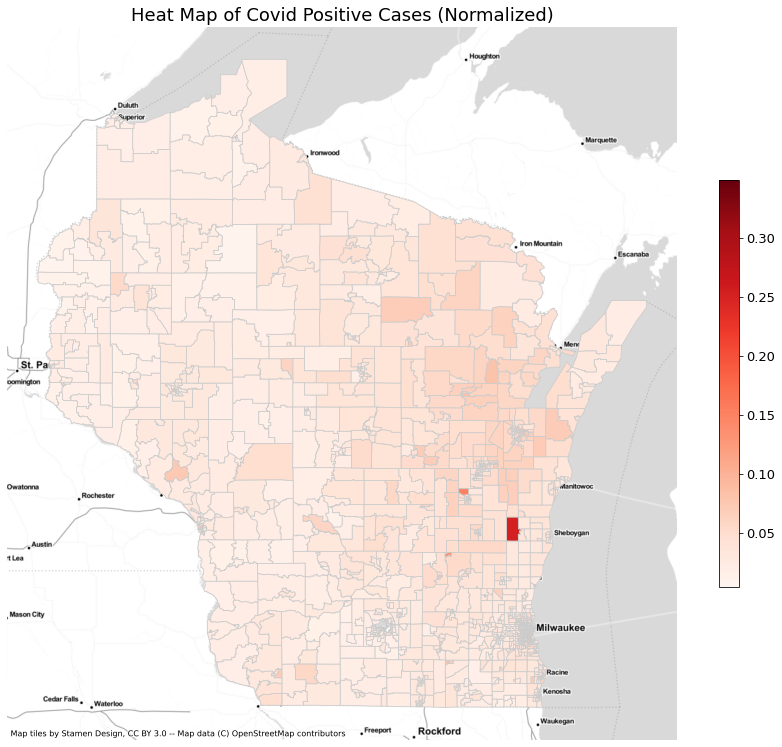

In [53]:
fig, ax = plt.subplots(1, figsize=(15,15))
ax.axis('off')
ax.set_title('Heat Map of Covid Positive Cases (Normalized)', fontsize=18)
color = 'Reds'
vmin, vmax = gdf_covid['POS_NORM'].min(), gdf_covid['POS_NORM'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
gdf_covid.plot('POS_NORM', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(15,15))
contextily.add_basemap(ax, source=contextily.providers.Stamen.TonerLite)
cbar = fig.colorbar(sm, shrink=0.5)
cbar.ax.tick_params(labelsize=13)

In [54]:
covid_cases_norm

GEOID  TotPop  POSITIVE  POS_NORM
0     55001950100    2870     104.0  0.036237
1     55001950201    1244      30.0  0.024116
2     55001950202    2599      99.0  0.038092
3     55001950400    4533     122.0  0.026914
4     55001950501    1603      19.0  0.011853
...           ...     ...       ...       ...
1396  55141011300    4696     127.0  0.027044
1397  55141011400    4902     136.0  0.027744
1398  55141011500    5593     180.0  0.032183
1399  55141011600    4995     103.0  0.020621
1400  55141011700    4427     137.0  0.030946

[1392 rows x 4 columns]

### Prepare data for the classification

For destination with populations of 200,000 or less, CDC's primary criterion for classification is based on 1) Covid-19 case counts (cumulative new cases over the past 28 days) and 2) new case trajectory (are new cases over the past 28 days increasing, decreasing, or stable?). In particular, CDC has the following classification:
1. Level 1 (Low): less than 10 case count over past 28 days
2. Level 2 (Moderate): 10-50 case count over past 28 days
3. Level 3 (High): 51-100 case counts over past 28 days
4. Level 4 (Very High): >100 case counts over the past 28 days

In [55]:
# subset 28 days
start_date28 = pd.to_datetime("2020-10-03").date()
end_date28 = pd.to_datetime("2020-10-31").date()

# your code here
# create mask and apply mask in dataframe
refmask = (covid_df["DATE"] >= start_date28) & (covid_df["DATE"] <= end_date28)

covid_df_28 = covid_df.loc[refmask]
covid_df_28.head()

GEOID           GEO        DATE  ...  HOSP_NO  HOSP_UNK  OBJECTID
227084  55139002900  Census tract  2020-10-23  ...     70.0      15.0    243604
227085  55139003000  Census tract  2020-10-23  ...     26.0      15.0    243605
227086  55139003100  Census tract  2020-10-23  ...     39.0      17.0    243606
227087  55139003200  Census tract  2020-10-23  ...     40.0      32.0    243607
227088  55139003300  Census tract  2020-10-23  ...     57.0      29.0    243608

[5 rows x 14 columns]

In [56]:
# replace -999 to nan
covid_df_28.replace(-999, np.nan, inplace=True)

In [57]:
covid_df_28.groupby(['GEOID'])['POSITIVE'].min()

GEOID
55001950100    56.0
55001950201    14.0
55001950202    46.0
55001950400    51.0
55001950501     5.0
               ... 
55141011300    43.0
55141011400    63.0
55141011500    93.0
55141011600    58.0
55141011700    76.0
Name: POSITIVE, Length: 1401, dtype: float64

In [58]:
min_28 = pd.DataFrame(covid_df_28.groupby(['GEOID'])['POSITIVE'].min())
max_28 = pd.DataFrame(covid_df_28.groupby(['GEOID'])['POSITIVE'].max())
min_28.reset_index(inplace=True)
max_28.reset_index(inplace=True)

In [59]:
# Total cumulative cases minus total cases 28 days ago to obtain case count for the past 28 days
covid_df_28 = pd.merge(max_28, min_28, on='GEOID')
covid_df_28.dropna(inplace=True)
covid_df_28['CASE28'] = covid_df_28['POSITIVE_x'].astype(int) - covid_df_28['POSITIVE_y'].astype(int)
covid_df_28['CLASS'] = np.nan
covid_df_28

GEOID  POSITIVE_x  POSITIVE_y  CASE28  CLASS
0     55001950100       104.0        56.0      48    NaN
1     55001950201        30.0        14.0      16    NaN
2     55001950202        99.0        46.0      53    NaN
3     55001950400       122.0        51.0      71    NaN
4     55001950501        19.0         5.0      14    NaN
...           ...         ...         ...     ...    ...
1396  55141011300       127.0        43.0      84    NaN
1397  55141011400       136.0        63.0      73    NaN
1398  55141011500       180.0        93.0      87    NaN
1399  55141011600       103.0        58.0      45    NaN
1400  55141011700       137.0        76.0      61    NaN

[1392 rows x 5 columns]

In [60]:
# change case counts to classification labels based on CDC guidelines
# your code here

for idx, row in covid_df_28.iterrows():
  if row["CASE28"] < 10 :
    covid_df_28.loc[idx, "CLASS"] = 1 
  elif (row["CASE28"] >= 10) & (row["CASE28"] <= 50) :
    covid_df_28.loc[idx, "CLASS"] = 2
  elif (row["CASE28"] >= 51) & (row["CASE28"] <= 100) :
    covid_df_28.loc[idx, "CLASS"] = 3
  else:
    covid_df_28.loc[idx, "CLASS"] = 4    


In [61]:
covid_df_28['CLASS'] = covid_df_28['CLASS'].astype(int)
covid_df_28

GEOID  POSITIVE_x  POSITIVE_y  CASE28  CLASS
0     55001950100       104.0        56.0      48      2
1     55001950201        30.0        14.0      16      2
2     55001950202        99.0        46.0      53      3
3     55001950400       122.0        51.0      71      3
4     55001950501        19.0         5.0      14      2
...           ...         ...         ...     ...    ...
1396  55141011300       127.0        43.0      84      3
1397  55141011400       136.0        63.0      73      3
1398  55141011500       180.0        93.0      87      3
1399  55141011600       103.0        58.0      45      2
1400  55141011700       137.0        76.0      61      3

[1392 rows x 5 columns]

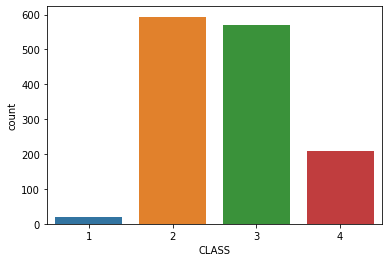

In [62]:
ax = sns.countplot(x='CLASS', data=covid_df_28)

# Physics-based Data

In [63]:
def getPandasFromFile(path, fileName, theSkipRow):
    path = os.path.join(path , fileName)
    return pd.read_csv(path, skiprows= theSkipRow , header=None)

def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')

def GetPandasFromFile(path, theSkipRow):
    return pd.read_csv(path, skiprows= theSkipRow , header=None)

def RemoveColumnsWithNull(data, num):
    complete_cols = [column for column in data.columns if len(data[column][data[column].isnull()]) < num]
    return data[complete_cols]

from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

def find_nearest(lat, long):
    distances = df.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), 
        axis=1)
    return df.loc[distances.idxmin(), 'Location']

In [64]:
# load covid data
Wisc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/J_Term/BigData/wisc-COVID-19_Historical_Data_by_Census_Tract.csv')
Wisc_col = RemoveColumnsWithNull(Wisc,100)
Wisc_col.head()

GEOID           GEO  ... DTH_7DAYAVG  OBJECTID
0  55021970900  Census tract  ...         0.0       185
1  55021971000  Census tract  ...         0.0       186
2  55021971100  Census tract  ...         0.0       187
3  55021971200  Census tract  ...         0.0       188
4  55023960100  Census tract  ...         0.0       190

[5 rows x 8 columns]

In [65]:
# load census data
geoid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/J_Term/BigData/Wisconsin_CensusTract_Pop_LatLon.csv')
geoid.head()

Unnamed: 0  STATEFP  COUNTYFP  ...   LATITUDE  LONGITUDE  CensusTract
0           0       55         1  ...  44.204591 -89.794521  55001950100
1           1       55         1  ...  44.002663 -89.871206  55001950201
2           2       55         1  ...  44.085508 -89.812851  55001950202
3           3       55         1  ...  43.957111 -89.799668  55001950400
4           4       55         1  ...  43.898427 -89.907775  55001950501

[5 rows x 8 columns]

In [66]:
# load weather data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/J_Term/BigData/station_data.csv')
df

No. State                       Location  ...  Average WD  NV hours   NV%
0   498    WI             Rhinelander Oneida  ...         188      2447  27.9
1   967    WI             Appleton Outagamie  ...         170      2300  26.3
2   968    WI           Eau Claire County Ap  ...         250      2394  27.3
3   969    WI               Antigo Lang Awos  ...         140      1917  21.9
4   970    WI  Green Bay Austin Straubel Int  ...         195      2453  28.0
5   971    WI             Janesville Rock Co  ...         180      2792  31.9
6   972    WI       La Crosse Municipal Arpt  ...         190      2176  24.8
7   973    WI               Lone Rock Faa Ap  ...         165      2604  29.7
8   974    WI  Madison Dane Co Regional Arpt  ...         187      2082  23.8
9   975    WI            Manitowac Muni Awos  ...         190      2282  26.1
10  976    WI                Marshfield Muni  ...         162      2684  30.6
11  977    WI     Milwaukee Mitchell Intl Ap  ...         203      2353  26.9
12  978    WI              Minocqua Woodruff  ...         170      2590  29.6
13  979    WI             Mosinee Central Wi  ...         184      2555  29.2
14  980    WI              Phillips Price Co  ...         150      2449  28.0
15  981    WI            Rice Lake Municipal  ...         145      2068  23.6
16  982    WI                   Sturgeon Bay  ...         185      2736  31.2
17  983    WI                      Watertown  ...         162      2129  24.3
18  984    WI          Wausau Municipal Arpt  ...         183      2393  27.3
19  985    WI                   Wittman Rgnl  ...         190      2545  29.1

[20 rows x 19 columns]

In [67]:
# visualize df information
geoid=geoid.rename(columns = {'LATITUDE':'lat','LONGITUDE':'lon'})
df=df.rename(columns = {'Latitude':'lat','Longtitude':'lon'})
geoid.info() 
print('\n XXXXXXXXXXXXXXXXXXXXXXX\n')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1409 non-null   int64  
 1   STATEFP      1409 non-null   int64  
 2   COUNTYFP     1409 non-null   int64  
 3   TRACTCE      1409 non-null   int64  
 4   POPULATION   1409 non-null   int64  
 5   lat          1409 non-null   float64
 6   lon          1409 non-null   float64
 7   CensusTract  1409 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 88.2 KB

 XXXXXXXXXXXXXXXXXXXXXXX

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No.           20 non-null     int64  
 1   State         20 non-null     object 
 2   Location      20 non-null     object 
 3   lat           20 non-null     float64
 4   lon           20 non-null     

In [68]:
# create values to analyze data
df['Temp_Range'] = df['Max Temp'] - df['Min Temp']
df['RH_Range'] = df['Max RH'] - df['Min RH']
df.head()

No. State                       Location  ...   NV%  Temp_Range  RH_Range
0  498    WI             Rhinelander Oneida  ...  27.9        55.0        89
1  967    WI             Appleton Outagamie  ...  26.3        54.3        85
2  968    WI           Eau Claire County Ap  ...  27.3        70.5        92
3  969    WI               Antigo Lang Awos  ...  21.9        65.0        92
4  970    WI  Green Bay Austin Straubel Int  ...  28.0        61.6        83

[5 rows x 21 columns]

In [69]:
# find the nearest location with function I created 

def find_nearest(lat, long):
    distances = df.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), 
        axis=1)
    return df.loc[distances.idxmin(), 'Location']

# your code here

geoid["Location"] = geoid.apply(  lambda row: find_nearest(row['lat'], row['lon']), axis=1)

geoid = pd.merge(geoid, df[['Location','lat','lon','Average Temp', 'Average WD', 'Average RH',	'Average WS',	'NV%', 'Temp_Range', 'RH_Range']],on='Location', how='left')
geoid=geoid.rename(columns = {'lat_x':'m_lat','lon_x':'m_lon','lat_y':'h_lat','lon_y':'h_lon'})

geoid.head()

Unnamed: 0  STATEFP  COUNTYFP  ...   NV%  Temp_Range  RH_Range
0           0       55         1  ...  30.6        59.0        84
1           1       55         1  ...  30.6        59.0        84
2           2       55         1  ...  30.6        59.0        84
3           3       55         1  ...  30.6        59.0        84
4           4       55         1  ...  29.7        61.0        80

[5 rows x 18 columns]

In [70]:
# add additional data for the reference
geoid['distance'] = [dist(geoid.m_lon[i],geoid.m_lat[i],geoid.h_lon[i],geoid.h_lat[i]) for i in range(len(geoid))]
geoid['distance'] = geoid['distance'].round(decimals=3)

geoid.head()

Unnamed: 0  STATEFP  COUNTYFP  TRACTCE  ...   NV%  Temp_Range  RH_Range  distance
0           0       55         1   950100  ...  30.6        59.0        84    42.863
1           1       55         1   950201  ...  30.6        59.0        84    34.336
2           2       55         1   950202  ...  30.6        59.0        84    40.825
3           3       55         1   950400  ...  30.6        59.0        84    42.290
4           4       55         1   950501  ...  29.7        61.0        80    30.270

[5 rows x 19 columns]

In [71]:
# draw map to visualize data
import branca.colormap as cm

def generateBaseMap(default_location=[44.63, -90.18], default_zoom_start=8):
    base_map = folium.Map(location=default_location, control_scale=True, 
                          zoom_start=default_zoom_start, tiles ="OpenStreetMap",   
                            width='100%',
                            height='100%')
    return base_map
baseMap = generateBaseMap()

for i in range(0,len(geoid)):
    html= "Wind speed" + "\n" + ':'+ str(geoid["Average WS"].tolist()[i]) + " m/s" +"\n" "wind direction : " +str(geoid["Average WD"].tolist()[i]) +" degrees" + "\n""Temperature" + "\n" + ':'+ str(geoid["Average Temp"].tolist()[i]) + " C" +"\n" "Relative humidity : " +str(geoid["Average RH"].tolist()[i])+" %" 
    iframe = folium.IFrame(html=html, width=250, height=100)
    popup = folium.Popup(iframe, max_width=500)
    folium.Marker(location=[geoid["m_lat"].tolist()[i],geoid["m_lon"].tolist()[i]],popup=popup,tooltip= str(geoid["Location"].tolist()[i])).add_to(baseMap)

    
display(baseMap)

In [72]:
# filter data and visualize the NV classes
baseMap = generateBaseMap()
colordict = {0: 'lightblue', 1: 'lightblue', 2: 'orange', 3: 'red'}

for i in range(0,len(df)):
    folium.Marker(location=[df["lat"].tolist()[i],df["lon"].tolist()[i]],tooltip= str(df["Location"].tolist()[i])).add_to(baseMap)

for i in range(0,len(geoid)):

    if 24>float(geoid["NV%"][i])>20:
        color = colordict[3]
    elif 28>float(geoid["NV%"][i])>24:
        color = colordict[2]
    elif 32>float(geoid["NV%"][i])>28:
        color="#E37222" # tangerine
    else:
        color=colordict[0]

    html= "Wind speed" + "\n" + ':'+ str(geoid["Average WS"].tolist()[i]) + " m/s" +"\n" "wind direction : " +str(geoid["Average WD"].tolist()[i]) +" degrees" + "\n""Temperature" + "\n" + ':'+ str(geoid["Average Temp"].tolist()[i]) + " C" +"\n" "Relative humidity : " +str(geoid["Average RH"].tolist()[i])+" %" 
    iframe = folium.IFrame(html=html, width=250, height=200)
    popup = folium.Popup(iframe, max_width=500)
    folium.Circle(
      location=[geoid["m_lat"][i],geoid["m_lon"][i]],
      radius=float(geoid["NV%"][i]) * 250,
        popup = popup,
      color=False,
      fill=True,
      fill_color= color
   ).add_to(baseMap)
    
    
display(baseMap)

# Merge dataframe for modeling

In [73]:
# remove unnecessary
df_geo_prescaled = geoid.copy()
df_geo_prescaled.rename(columns = {"CensusTract": "GEOID"}, inplace = True) 
df_geo_prescaled = df_geo_prescaled.drop(['Unnamed: 0', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'POPULATION', 'm_lat', 'm_lon', 'Location', 'h_lat', 'h_lon'], axis=1)
df_geo_prescaled.head()

GEOID  Average Temp  Average WD  ...  Temp_Range  RH_Range  distance
0  55001950100          7.76         162  ...        59.0        84    42.863
1  55001950201          7.76         162  ...        59.0        84    34.336
2  55001950202          7.76         162  ...        59.0        84    40.825
3  55001950400          7.76         162  ...        59.0        84    42.290
4  55001950501          9.15         165  ...        61.0        80    30.270

[5 rows x 9 columns]

In [74]:
# scale dataframe
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
geo_scaled = scaler.fit_transform(df_geo_prescaled.drop(['GEOID'], axis=1))

df_geo_scaled = pd.DataFrame(geo_scaled, columns=df_geo_prescaled.drop(['GEOID'], axis=1).columns)
df_geo_scaled.head()

Average Temp  Average WD  Average RH  ...  Temp_Range  RH_Range  distance
0      0.592375    0.200000    0.405776  ...    0.378378       0.4  0.301391
1      0.592375    0.200000    0.405776  ...    0.378378       0.4  0.241401
2      0.592375    0.200000    0.405776  ...    0.378378       0.4  0.287053
3      0.592375    0.200000    0.405776  ...    0.378378       0.4  0.297360
4      1.000000    0.227273    0.466426  ...    0.486486       0.2  0.212796

[5 rows x 8 columns]

In [75]:
df_geo_prescaled.iloc[:,0]

0       55001950100
1       55001950201
2       55001950202
3       55001950400
4       55001950501
           ...     
1404    55141011300
1405    55141011400
1406    55141011500
1407    55141011600
1408    55141011700
Name: GEOID, Length: 1409, dtype: int64

In [77]:
# merge GEOID data with scaled dataframe
df_geo = df_geo_scaled.copy()
# Your code here
df_geo["GEOID"] = df_geo_prescaled.iloc[:,0]

df_geo.head()

Average Temp  Average WD  Average RH  ...  RH_Range  distance        GEOID
0      0.592375    0.200000    0.405776  ...       0.4  0.301391  55001950100
1      0.592375    0.200000    0.405776  ...       0.4  0.241401  55001950201
2      0.592375    0.200000    0.405776  ...       0.4  0.287053  55001950202
3      0.592375    0.200000    0.405776  ...       0.4  0.297360  55001950400
4      1.000000    0.227273    0.466426  ...       0.2  0.212796  55001950501

[5 rows x 9 columns]

In [78]:
df_covid = covid_df_28.copy()
# Drop the unnecessary columns and change data type to integer
# Your code here
df_covid = df_covid.drop(['POSITIVE_x', 'POSITIVE_y', 'CASE28'], axis=1)
df_covid['GEOID'] = df_covid['GEOID'].astype(int)

df_covid.head()

GEOID  CLASS
0  55001950100      2
1  55001950201      2
2  55001950202      3
3  55001950400      3
4  55001950501      2

In [79]:
# merge dataframes
# Your code here
df_model = pd.merge(df_geo,df_covid, on="GEOID")

df_model.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
df_model

Average_Temp  Average_WD  Average_RH  ...  distance        GEOID  CLASS
0         0.592375    0.200000    0.405776  ...  0.301391  55001950100      2
1         0.592375    0.200000    0.405776  ...  0.241401  55001950201      2
2         0.592375    0.200000    0.405776  ...  0.287053  55001950202      3
3         0.592375    0.200000    0.405776  ...  0.297360  55001950400      3
4         1.000000    0.227273    0.466426  ...  0.212796  55001950501      2
...            ...         ...         ...  ...       ...          ...    ...
1387      0.592375    0.200000    0.405776  ...  0.277288  55141011300      3
1388      0.592375    0.200000    0.405776  ...  0.291056  55141011400      3
1389      0.592375    0.200000    0.405776  ...  0.327520  55141011500      3
1390      0.592375    0.200000    0.405776  ...  0.287918  55141011600      2
1391      0.592375    0.200000    0.405776  ...  0.226761  55141011700      3

[1392 rows x 10 columns]

## Now we are ready to train data!
